In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns

## Create a column for number of missing cells in that row

In [3]:
df = pd.read_csv('fake_job_postings.csv')

df = df.transpose()

# get count of missing values in row
numeric = df.isin([np.nan]).sum(axis=0)
df = df.transpose()
# Add column "missing_values" to df
df['missing_values'] = numeric
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,missing_values
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,4
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,8
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,2
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,7
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,3


## Data frame considering only these columns

In [4]:
# Data frame considering only these columns
dfLBF = df[['location', 'benefits', 'requirements','required_education', 'missing_values', \
            'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']]

## Create columns called 'city uniqueness' and 'benefits wordcount'

In [27]:
# there is no use for null values for location in my analysis
dfLBF = dfLBF.dropna(subset=['location'])

# convert null values to empty strings for analysis
dfLBF = dfLBF.fillna('')

locationList = list(dfLBF['location'].values)


#def getCityName(s):
    #l = s.split(', ')
    #return l[-1]
    
def getCityName(s):
    l = s.split(', ')
    cityName = l[-1]
    return l[-1]

dfLBF['city name'] = dfLBF['location'].map(getCityName)

# ignore results where city name is blank (most likely from locations that did not specify anything after a comma
# such as locations that only specified country, but no province/state or city)
# assume the number of different cities with same name is negligible (reasonable)
#dfLBF = dfLBF[dfLBF['city name'] != '']

#cityList = list(dfLBF['city name'].values)

#def getUniqueness(s):
 #   return cityList.count(s)

#dfLBF['city uniqueness'] = dfLBF['city name'].map(getUniqueness)

dfLBF 

,location,benefits,requirements,required_education,missing_values,telecommuting,has_company_logo,has_questions,fraudulent,city name,city uniqueness,benefits wordcount,requirements wordcount,above-college
0,"US, NY, New York",,Experience with content management systems a m...,,4,0,1,0,0,New York,669,0,115,0.0
1,"NZ, , Auckland",What you will get from usThrough being part of...,What we expect from you:Your key responsibilit...,,2,0,1,0,0,Auckland,227,225,187,0.0
2,"US, IA, Wever",,Implement pre-commissioning and commissioning ...,,8,0,1,0,0,Wever,3,0,164,0.0
3,"US, DC, Washington",Our culture is anything but corporate—we have ...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Bachelor's Degree,1,0,1,0,0,Washington,255,96,174,1.0
4,"US, FL, Fort Worth",Full Benefits Offered,QUALIFICATIONS:RN license in the State of Texa...,Bachelor's Degree,2,0,1,1,0,Fort Worth,28,3,89,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",What can you expect from us?We have an open cu...,To ace this role you:Will eat comprehensive St...,,2,0,1,1,0,Toronto,128,161,180,0.0
17876,"US, PA, Philadelphia",Health &amp; WellnessMedical planPrescription ...,- B.A. or B.S. in Accounting- Desire to have f...,Bachelor's Degree,1,0,1,1,0,Philadelphia,115,52,107,1.0
17877,"US, TX, Houston",,At least 12 years professional experience.Abil...,,7,0,0,0,0,Houston,272,0,155,0.0
17878,"NG, LA, Lagos",Competitive salary (compensation will be based...,1. Must be fluent in the latest versions of Co...,Professional,3,0,0,1,0,Lagos,2,35,86,0.0


In [6]:
# spaces do not account for word counts for all benefit values
# but it is a good approximation
def getWordCount(s):
    if s == '':
        return 0
    else:
        l = s.split(' ')
        return len(l)

dfLBF['benefits wordcount'] = dfLBF['benefits'].map(getWordCount)

dfLBF

,location,benefits,requirements,required_education,missing_values,telecommuting,has_company_logo,has_questions,fraudulent,city name,city uniqueness,benefits wordcount
0,"US, NY, New York",,Experience with content management systems a m...,,4,0,1,0,0,New York,669,0
1,"NZ, , Auckland",What you will get from usThrough being part of...,What we expect from you:Your key responsibilit...,,2,0,1,0,0,Auckland,227,225
2,"US, IA, Wever",,Implement pre-commissioning and commissioning ...,,8,0,1,0,0,Wever,3,0
3,"US, DC, Washington",Our culture is anything but corporate—we have ...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Bachelor's Degree,1,0,1,0,0,Washington,255,96
4,"US, FL, Fort Worth",Full Benefits Offered,QUALIFICATIONS:RN license in the State of Texa...,Bachelor's Degree,2,0,1,1,0,Fort Worth,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",What can you expect from us?We have an open cu...,To ace this role you:Will eat comprehensive St...,,2,0,1,1,0,Toronto,128,161
17876,"US, PA, Philadelphia",Health &amp; WellnessMedical planPrescription ...,- B.A. or B.S. in Accounting- Desire to have f...,Bachelor's Degree,1,0,1,1,0,Philadelphia,115,52
17877,"US, TX, Houston",,At least 12 years professional experience.Abil...,,7,0,0,0,0,Houston,272,0
17878,"NG, LA, Lagos",Competitive salary (compensation will be based...,1. Must be fluent in the latest versions of Co...,Professional,3,0,0,1,0,Lagos,2,35


## Pivot table and heatmap of 'benefits wordcount' vs. 'city uniqueness' in terms of number of fraudulent

- 'city uniqueness' not very correlated with fraudulent beyond the 'benefits wordcount' == 0 level

In [7]:
table = pd.pivot_table(dfLBF, index='benefits wordcount', columns='city uniqueness',\
                       values='fraudulent', aggfunc='sum')
        
table

city uniqueness,1,2,3,4,5,6,7,8,9,10,...,185,227,255,257,262,272,477,553,669,1069
benefits wordcount,,,,,,,,,,,,,,,,,,,,,
0,46.0,21.0,15.0,3.0,5.0,7.0,1.0,4.0,2.0,1.0,...,12.0,0.0,0.0,1.0,0.0,48.0,5.0,0.0,7.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,...,1.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0
3,3.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,4.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0
4,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


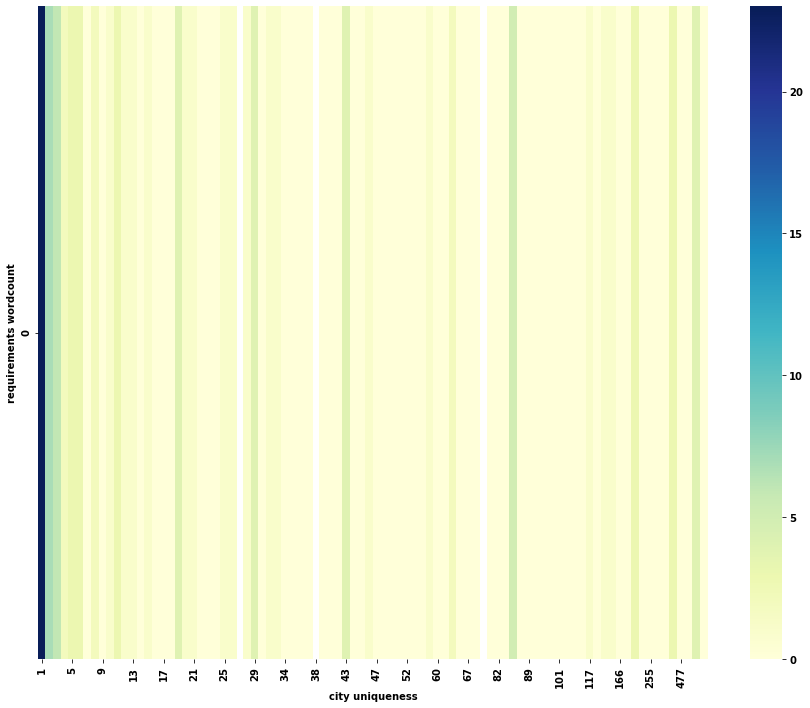

In [23]:
sns.heatmap(table.iloc[0:1,:], cmap='YlGnBu')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,12)

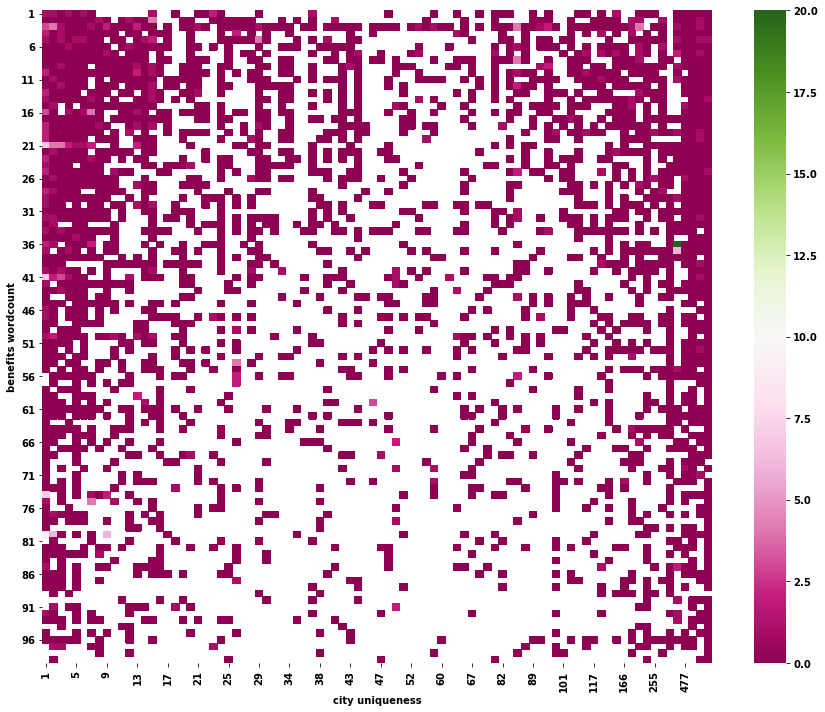

In [9]:
sns.heatmap(table.iloc[1:100,:], cmap='PiYG')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,12)

## Same as above, but with 'requirements wordcount'

- Just as with previous heatmap, we see 'city uniqueness' not very correlated with fraudulent beyond the 'requirements wordcount' == 0 level
- Has less interpretable pattern/correlation than with 'benefits wordcount'

- **Choose to use only 'benefits wordcount', not any other 'wordcount' as a predictor**

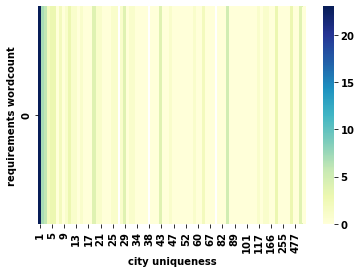

In [25]:
dfLBF['requirements wordcount'] = dfLBF['requirements'].map(getWordCount)

table = pd.pivot_table(dfLBF, index='requirements wordcount', columns='city uniqueness',\
                       values='fraudulent', aggfunc='sum')

sns.heatmap(table.iloc[0:1,:], cmap='YlGnBu')

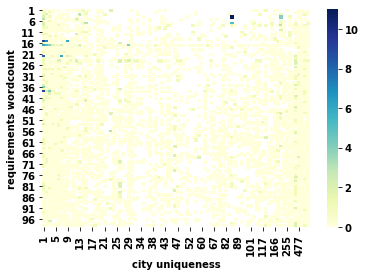

In [11]:
sns.heatmap(table.iloc[1:100,:], cmap='YlGnBu')

## Normalized look at fraudulent level by different education and experience level 

- Hard to discern a pattern between experience level and fraudulent level
- Hard to discern a pattern between education level and fraudulent level
- **Don't include 'required_education' and 'required_experience' as predictors**

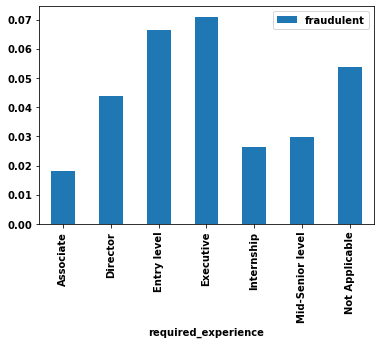

In [12]:
# try and see if stated level of required experience has association with fraudulent (normalized)
normalized = df.groupby(['required_experience'])[['fraudulent']].sum() / \
df.groupby(['required_experience'])[['fraudulent']].count()

normalized.plot(kind='bar')

In [16]:
df.groupby(['required_education'])[['fraudulent']].sum() / \
df.groupby(['required_education'])[['fraudulent']].count()

,fraudulent
required_education,
Associate Degree,0.021898
Bachelor's Degree,0.019436
Certification,0.111765
Doctorate,0.038462
High School or equivalent,0.081731
Master's Degree,0.074519
Professional,0.054054
Some College Coursework Completed,0.029412
Some High School Coursework,0.740741


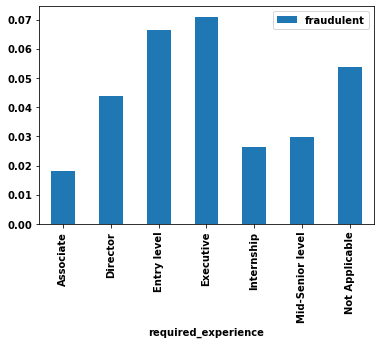

In [17]:
normalized.plot(kind='bar')
# we can see that there is a great difference in fraudulent rate if we split by above-college or below-college education

In [18]:
# create new dummy variable of 'above-college'

# create a new 'target' column with all 0
dfLBF['above-college'] = 0.0
                                    
dfLBF.loc[dfLBF['required_education'] == 'Associate Degree', 'above-college'] = 1.0
dfLBF.loc[dfLBF['required_education'] == 'Bachelor\'s Degree', 'above-college'] = 1.0
dfLBF.loc[dfLBF['required_education'] == 'Doctorate', 'above-college'] = 1.0
dfLBF.loc[dfLBF['required_education'] == 'Some College Coursework Completed', 'above-college'] = 1.0



## 'telecommuting', 'has_company_logo', 'has_questions'

- The ratio of fraudulent between 0 and 1 for each of these variables is sufficiently away from 50:50 to conclude that there is some correlation
- **Include the three variables for classification**

In [19]:
dfLBF.groupby(['telecommuting'])[['fraudulent']].sum()

,fraudulent
telecommuting,
0,666
1,52


In [20]:
dfLBF.groupby(['has_company_logo'])[['fraudulent']].sum()

,fraudulent
has_company_logo,
0,451
1,267


In [21]:
dfLBF.groupby(['has_questions'])[['fraudulent']].sum()

,fraudulent
has_questions,
0,497
1,221


## Consider these variables

In [22]:
# consider these variables for classification
dfConsider = dfLBF[['benefits wordcount', 'telecommuting', 'has_company_logo', 'has_questions', \
                    'missing_values', 'fraudulent']]


## Classification

In [ ]:
# can't get syntax to work

#Y, X = dmatrices('fraudulent ~ 0 + (benefits wordcount) + telecommuting + has_company_logo + \
                    #has_questions + missing_values', dfConsider, return_type="dataframe")